# KHÁM PHÁ DỮ LIỆU

Dữ liệu chứa trong file `tips.csv` chứa thông tin tiền tip của khách hàng tại một nhà hàng. Dữ liệu có các thông tin sau:

- `total_bill`: tổng hoá đơn (USD)
- `tip`: tiền tip/ tiền boa (USD)
- `sex`: giới tính người thanh toán hóa đơn
- `smoker`: có hút thuốc hay không
- `day`: ngày trong tuần
- `time`: thời gian dùng bữa(buổi sáng, buổi trưa, buổi tối)
- `size`: số lượng người tham gia

Bạn hãy thực hiện thống kê mô tả để tìm hiểu về hành vi tip của khách hàng tại nhà hàng

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/tips.csv', header=0)
df.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.describe()

,Unnamed: 0,total_bill,tip,size
count,244.000000,244.000000,244.000000,244.000000
mean,121.500000,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.951100
min,0.000000,3.070000,1.000000,1.000000
25%,60.750000,13.347500,2.000000,2.000000
50%,121.500000,17.795000,2.900000,2.000000
75%,182.250000,24.127500,3.562500,3.000000
max,243.000000,50.810000,10.000000,6.000000


## HIỂU DỮ LIỆU

1. Đọc dữ liệu
2. Xoá cột `Unnamed: 0`
3. Cho biết dữ liệu có bao nhiêu dòng, bao nhiêu thuộc tính.
4. Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng
5. Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?
6. Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?
7. Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?
8. Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?
9. Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?
10. Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?

In [4]:
# 1. Đọc dữ liệu
df

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
# 2. Xoá cột `Unnamed: 0`
df.pop('Unnamed: 0')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
# 3. Cho biết dữ liệu có bao nhiêu dòng, bao nhiêu thuộc tính.
df.shape

(244, 7)

- 244 dòng và 7 thuộc tính

In [7]:
# 4. Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

| Loại thuộc tính | Cột                              |
| --------------- | -------------------------------- |
| Định tính       | sex, smoker                      |
| Định lượng      | total_bill, tip, day, time, size |


In [8]:
# 5. Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?
print(df["sex"].value_counts())
print(df["sex"].value_counts(normalize=True) * 100)

sex
Male      157
Female     87
Name: count, dtype: int64
sex
Male      64.344262
Female    35.655738
Name: proportion, dtype: float64


| Giới tính | Số lượng | Phần trăm |
| --------- | -------- | --------- |
| Nam       | 157      | 64.344262 |
| Nữ        | 87       | 35.655738 |

In [9]:
# 6. Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?
print(df['smoker'].value_counts())
print(df['smoker'].value_counts(normalize=True) * 100)

smoker
No     151
Yes     93
Name: count, dtype: int64
smoker
No     61.885246
Yes    38.114754
Name: proportion, dtype: float64


| Người hút thuốc | Số lượng | Tỷ lệ |
| --------------- | -------- | --------- |
| Không hút       | 151      | 61.885246 |
| Có hút          | 93       | 38.114754 |

In [10]:
# 7. Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?
print(df['day'].value_counts())
print(df['day'].value_counts(normalize=True) * 100)

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
day
Sat     35.655738
Sun     31.147541
Thur    25.409836
Fri      7.786885
Name: proportion, dtype: float64


| Ngày | Số lượng | Phần Trăm |
| ---- | -------- | --------- |
| Sat  | 87       | 35.655738 |
| Sun  | 76       | 31.147541 |
| Thur | 62       | 25.409836 |
| Fri  | 19       | 7.786885  |


In [11]:
# 8. Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?
print(df['time'].value_counts())
print(df['time'].value_counts(normalize=True) * 100)

time
Dinner    176
Lunch      68
Name: count, dtype: int64
time
Dinner    72.131148
Lunch     27.868852
Name: proportion, dtype: float64


| Bữa ăn   | Số lượng | Tỷ lệ     |
| -------- | -------- | --------- |
| Bữa tối  | 176      | 72.131148 |
| Bữa trưa | 68       | 27.868852 |


In [12]:
# 9. Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?
df['size'].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

- Nhóm **2 người** là dùng bữa tại nhà hàng nhiều nhất **(156)**

In [19]:
# 10. Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?
avg_size = df['size'].mean()
print("Trung bình trong một bữa ăn nhà hàng phục vụ {:.2f} khách".format(avg_size))

Trung bình trong một bữa ăn nhà hàng phục vụ 2.57 khách


## YẾU TỐ ẢNH HƯỞNG ĐẾN TIỀN TIP

Trong phần này, chúng ta thử tìm hiểu về tiền tip tại nhà hàng và các yếu tố có thể ảnh hưởng đến nó

1. Tỷ lệ nhận được tiền tip của nhà hàng là bao nhiêu?
2. Tỷ lệ tiền tip trên tổng hóa đơn là bao nhiêu?
3. Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
4. Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
5. Thống kê tổng số tiền tip nhận được theo ngày.

In [26]:
# 1. Tỷ lệ nhận được tiền tip của nhà hàng là bao nhiêu?
tip_rate = (df[df["tip"] > 0].shape[0] / df.shape[0]) * 100
print("Tỷ lệ nhận được tiền tip của nhà hàng là {:.2f}".format(tip_rate))

Tỷ lệ nhận được tiền tip của nhà hàng là 100.00


In [ ]:
# 2. Tỷ lệ tiền tip trên tổng hóa đơn là bao nhiêu?
tip_rate_on_total_bill = (df['tip'] / df['total_bill']).mean()
print("Tỷ lệ tiền tip trên tổng hóa đơn là {:.2f}".format(tip_rate_on_total_bill))

Tỷ lệ tiền tip trên tổng hóa đơn là 0.16


In [ ]:
# 3. Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?

male_total_tip = df[df["sex"] == "Male"]["tip"].sum()
female_total_tip = df[df["sex"] == "Female"]["tip"].sum()
print(f"Tổng tiền nam tip {male_total_tip:.2f} và tổng tiền nữ tip {female_total_tip:.2f}")

male_percent, female_percent = df['sex'].value_counts(normalize=True) * 100
print(f"Tỷ lệ nam tip {male_percent:.2f} và tỷ lệ nữ tip {female_percent:.2f}")

Tổng tiền nam tip 485.07 và tổng tiền nữ tip 246.51
Tỷ lệ nam tip 64.34 và tỷ lệ nữ tip 35.66


- Vậy nam tip nhiều tiền hơn và thường xuyên hơn

In [ ]:
# 4. Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn, ai tip thường xuyên hơn?

smoker_total_tip = df[df["smoker"] == "Yes"]["tip"].sum()
no_smoker_total_tip = df[df["smoker"] == "No"]["tip"].sum()
print(
    f"Tổng tiền người hút thuốc tip {smoker_total_tip:.2f} và tổng tiền không hút thuốc tip {no_smoker_total_tip:.2f}"
)

no_smoker_percent, smoker_percent = df["smoker"].value_counts(normalize=True) * 100
print(
    f"Tỷ lệ người hút thuốc tip {smoker_percent:.2f} và tỷ lệ không hút thuốc tip {no_smoker_percent:.2f}"
)

Tổng tiền người hút thuốc tip 279.81 và tổng tiền không hút thuốc tip 451.77
Tỷ lệ người hút thuốc tip 38.11 và tỷ lệ không hút thuốc tip 61.89


- Vậy người không hút thuốc tip nhiều hơn và thường xuyên hơn

In [34]:
# 5. Thống kê tổng số tiền tip nhận được theo ngày.
df.groupby('day')['tip'].sum()

day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64

# TRỰC QUAN DỮ LIỆU

Để dễ hình dung, bạn hãy trực quan với một số câu hỏi sau đây:

1. Vẽ đồ thị thể hiện tổng tiền tip theo ngày
2. Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
3. Vẽ đồ thị histogram của tổng hoá đơn
4. Vẽ đồ thị boxplot của tổng hoá đơn
5. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.

## Với Matplotlib

Bạn hãy trực quan với thư viện matplotlib

In [35]:
import matplotlib.pyplot as plt

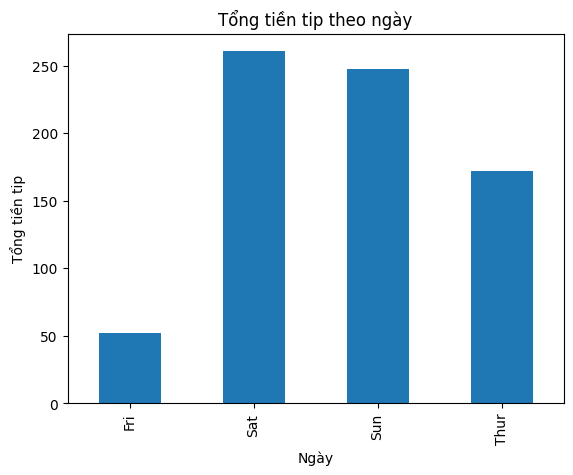

In [38]:
# 1. Vẽ đồ thị thể hiện tổng tiền tip theo ngày
df.groupby('day')['tip'].sum().plot(kind='bar')
plt.title('Tổng tiền tip theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Tổng tiền tip')
plt.show()

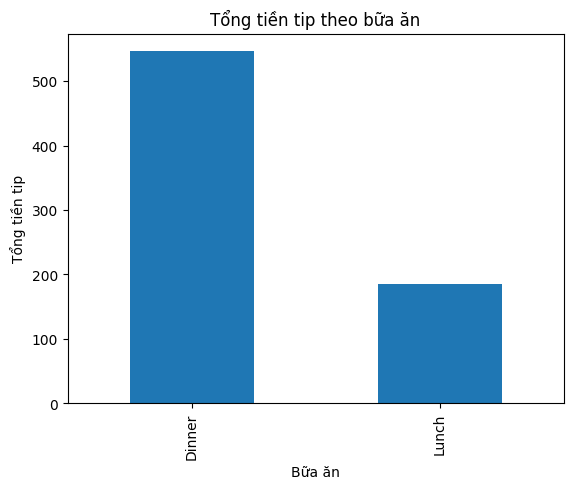

In [ ]:
# 2. Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
df.groupby('time')['tip'].sum().plot(kind='bar')
plt.title('Tổng tiền tip theo bữa ăn')
plt.xlabel('Bữa ăn')
plt.ylabel('Tổng tiền tip')
plt.show()

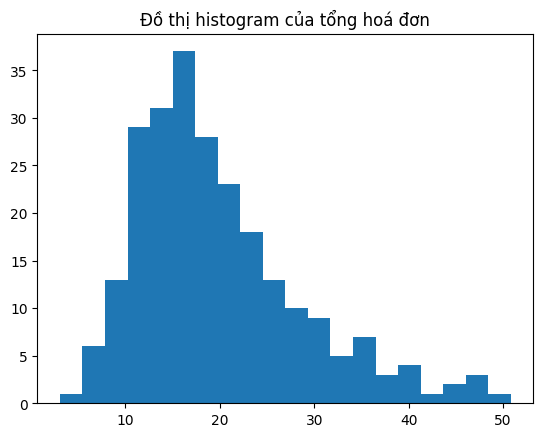

In [48]:
# 3. Vẽ đồ thị histogram của tổng hoá đơn
plt.hist(df['total_bill'], bins=20)
plt.title("Đồ thị histogram của tổng hoá đơn")
plt.show()

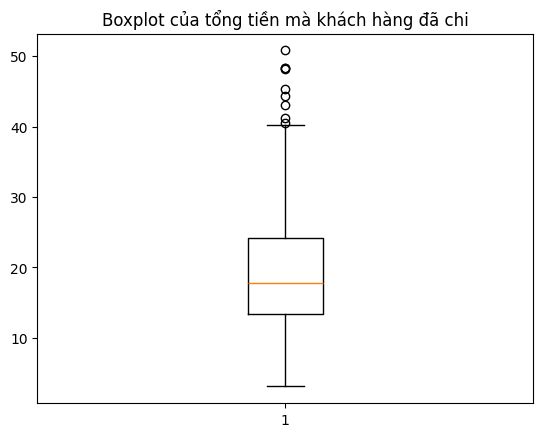

In [ ]:
# 4. Vẽ đồ thị boxplot của tổng hoá đơn
plt.boxplot(df['total_bill'])
plt.title('Boxplot của tổng tiền mà khách hàng đã chi')
plt.show()

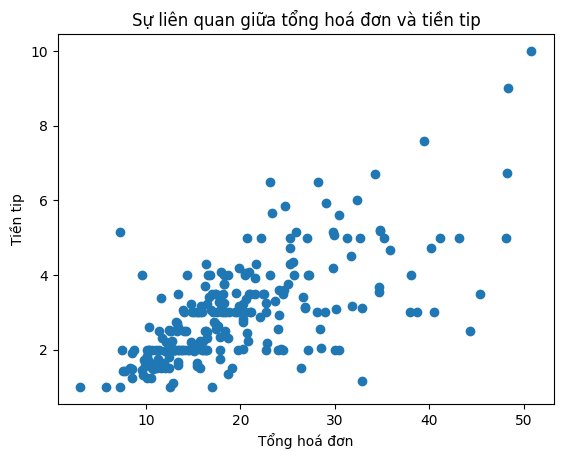

Hệ số tương quan giữa tổng hóa đơn và tiền tip: 0.68


In [53]:
# 5. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
plt.scatter(df['total_bill'], df['tip'])
plt.title('Sự liên quan giữa tổng hoá đơn và tiền tip')
plt.xlabel('Tổng hoá đơn')
plt.ylabel('Tiền tip')
plt.show()

correlation = df["total_bill"].corr(df["tip"])
print(f"Hệ số tương quan giữa tổng hóa đơn và tiền tip: {correlation:.2f}")

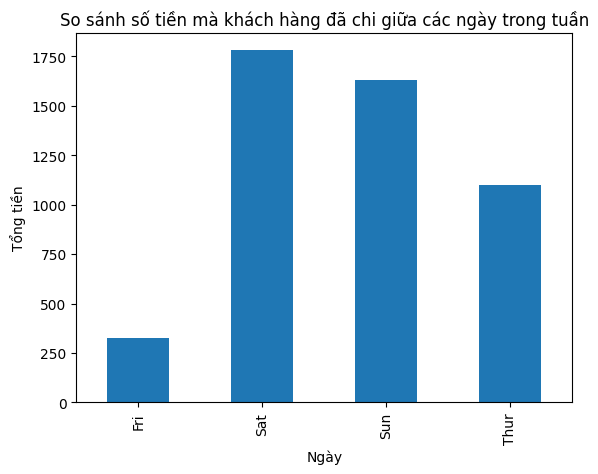

In [54]:
# 6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.
df.groupby('day')['total_bill'].sum().plot(kind='bar')
plt.title('So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần')
plt.xlabel('Ngày')
plt.ylabel('Tổng tiền')
plt.show()

## Với Seaborn

Bạn hãy tìm hiểu và trực quan với thư viện seaborn

In [55]:
import seaborn as sns

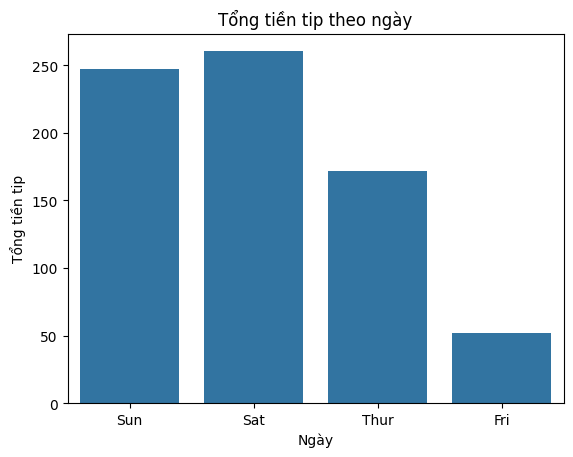

In [ ]:
# 1. Vẽ đồ thị thể hiện tổng tiền tip theo ngày
sns.barplot(x="day", y="tip", data=df, estimator=sum, errorbar=None)
plt.title('Tổng tiền tip theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Tổng tiền tip')
plt.show()

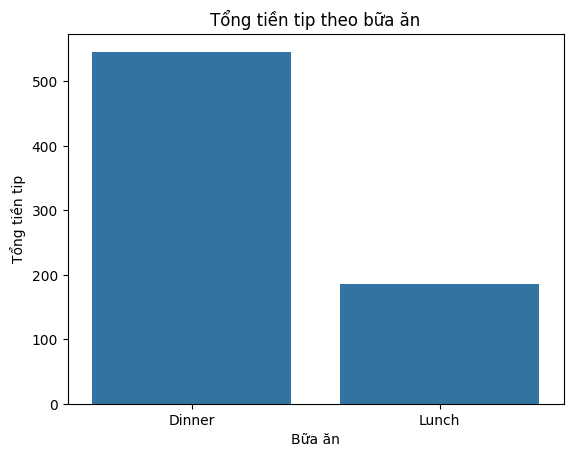

In [ ]:
# 2. Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
sns.barplot(x="time", y="tip", data=df, estimator=sum, errorbar=None)
plt.title('Tổng tiền tip theo bữa ăn')
plt.xlabel('Bữa ăn')
plt.ylabel('Tổng tiền tip')
plt.show()

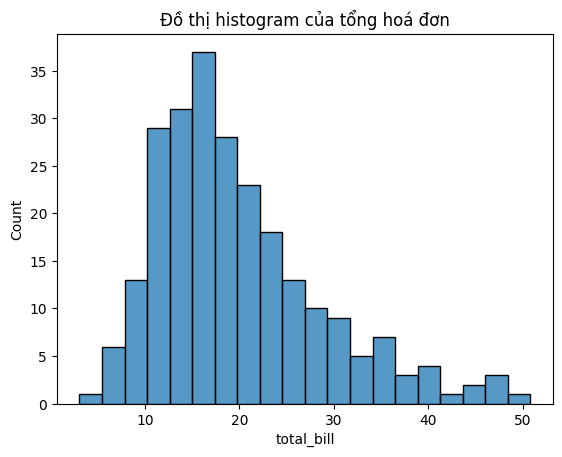

In [ ]:
# 3. Vẽ đồ thị histogram của tổng hoá đơn
sns.histplot(df['total_bill'], bins=20)
plt.title("Đồ thị histogram của tổng hoá đơn")
plt.show()

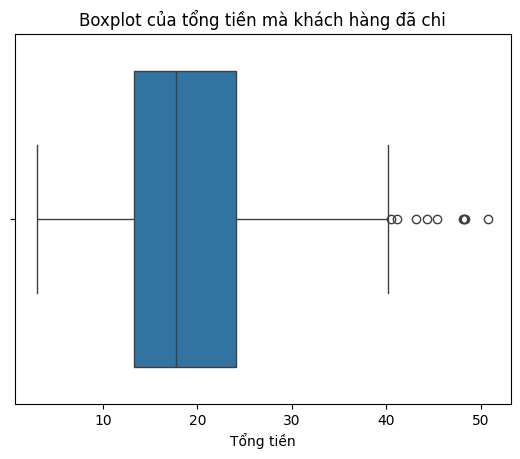

In [ ]:
# 4. Vẽ đồ thị boxplot của tổng hoá đơn
sns.boxplot(x=df['total_bill'])
plt.title('Boxplot của tổng tiền mà khách hàng đã chi')
plt.xlabel('Tổng tiền')
plt.show()

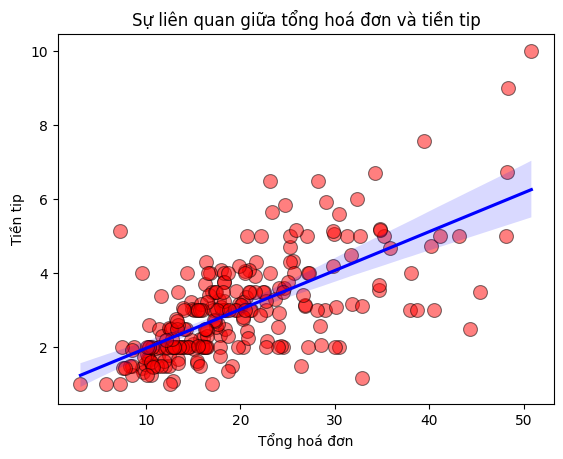

In [ ]:
# 5. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
sns.scatterplot(x='total_bill', y='tip', data=df, alpha=0.5, s=100, color='red', edgecolor='black')
sns.regplot(x='total_bill', y='tip', data=df, scatter=False, color='blue')
plt.title('Sự liên quan giữa tổng hoá đơn và tiền tip')
plt.xlabel('Tổng hoá đơn')
plt.ylabel('Tiền tip')
plt.show()

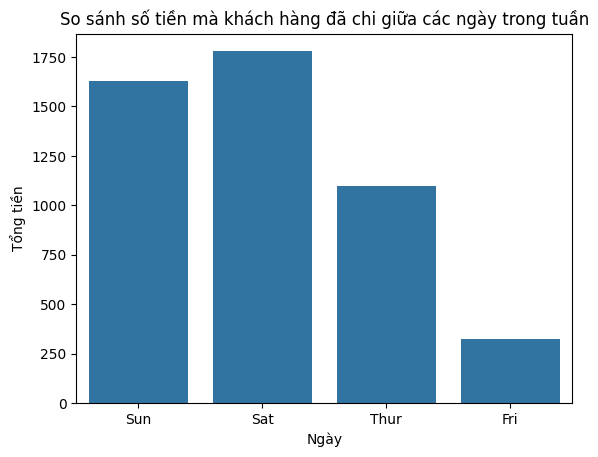

In [70]:
# 6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.
sns.barplot(x="day", y="total_bill", data=df, estimator=sum, errorbar=None)
plt.title('So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần')
plt.xlabel('Ngày')
plt.ylabel('Tổng tiền')
plt.show()